In [3]:
import pandas as pd
import numpy as np

file_path = '/Users/s/Downloads/time_series_apple/AI6123_Time_Series_Assignment_3 (Answer to part 1)/AAPL_from_1980-2024.csv'

df = pd.read_csv(file_path)

# df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)  
df.set_index('Date', inplace=True)

# only keep rows where 'Open' does not contain 'Dividend'
mask = ~df['Open'].astype(str).str.contains('Dividend')
filtered_df = df[mask].copy()

# transform columns to numeric
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
filtered_df[price_columns] = filtered_df[price_columns].apply(pd.to_numeric, errors='coerce')

# calculate moving averages
filtered_df['SMA_20'] = filtered_df['Close'].rolling(window=20).mean()
filtered_df['EMA_12'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()
filtered_df['EMA_26'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()

# calculate RSI
delta = filtered_df['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ma_up = up.rolling(window=14).mean()
ma_down = down.rolling(window=14).mean()
rs = ma_up / ma_down
filtered_df['RSI_14'] = 100 - (100 / (1 + rs))

# calculate MACD
filtered_df['MACD'] = filtered_df['EMA_12'] - filtered_df['EMA_26']
filtered_df['MACD_Signal'] = filtered_df['MACD'].ewm(span=9, adjust=False).mean()

# calculate Bollinger Bands
filtered_df['BB_Middle'] = filtered_df['SMA_20']
filtered_df['BB_Upper'] = filtered_df['BB_Middle'] + 2 * filtered_df['Close'].rolling(window=20).std()
filtered_df['BB_Lower'] = filtered_df['BB_Middle'] - 2 * filtered_df['Close'].rolling(window=20).std()

# calculate VWAP
filtered_df['VWAP'] = (filtered_df['Volume'] * (filtered_df['High'] + filtered_df['Low'] + filtered_df['Close']) / 3) / filtered_df['Volume']

print(filtered_df.head())

non_filtered_df = df[~mask]
print(non_filtered_df)

print(filtered_df['1980-12-12':'2024-04-26'])  # print filtered data from 1980-12-12 to 2024-04-26t 
filtered_df.to_csv('/Users/s/Downloads/time_series_apple/AI6123_Time_Series_Assignment_3 (Answer to part 1)/APPL_after_feature_engineering.csv')


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099192  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094017  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087117  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089273   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091861   73449600   

            SMA_20    EMA_12    EMA_26  RSI_14      MACD  MACD_Signal  \
Date                                                                    
1980-12-12     NaN  0.128348  0.128348     NaN  0.000000     0.000000   
1980-12-15     NaN  0.127318  0.127852     NaN -0.000534    -0.000107   
1980-12-16     NaN  0.125072  0.126731     NaN -0.001659    -0.000417   
1980-12-17     NaN  0.123602  0.125900     NaN -0.002299    -0.000793   
1980-12-18     NaN  0.122873 

In [4]:
import pandas as pd
import numpy as np
file_path = '/Users/s/Downloads/time_series_apple/AI6123_Time_Series_Assignment_3 (Answer to part 1)/AAPL_from_1980-2024.csv'

df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)  
df.set_index('Date', inplace=True)

mask = ~df['Open'].astype(str).str.contains('Dividend')
filtered_df = df[mask].copy()

price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
filtered_df[price_columns] = filtered_df[price_columns].apply(pd.to_numeric, errors='coerce')

# calculate Williams %R
high_14 = filtered_df['High'].rolling(window=14).max()
low_14 = filtered_df['Low'].rolling(window=14).min()
filtered_df['Williams'] = -100 * (high_14 - filtered_df['Close']) / (high_14 - low_14)

print(filtered_df.head())

non_filtered_df = df[~mask]
print(non_filtered_df)

print(filtered_df['2002-02-01':'2024-04-26'])  
filtered_df.to_csv('william.csv')

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099192  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094017  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087117  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089273   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091861   73449600   

            Williams  
Date                  
1980-12-12       NaN  
1980-12-15       NaN  
1980-12-16       NaN  
1980-12-17       NaN  
1980-12-18       NaN  
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2002-02-01    0.393750    0.416071    0.392143    0.416071    0.352246   
2002-

In [ ]:
%matplotlib inline

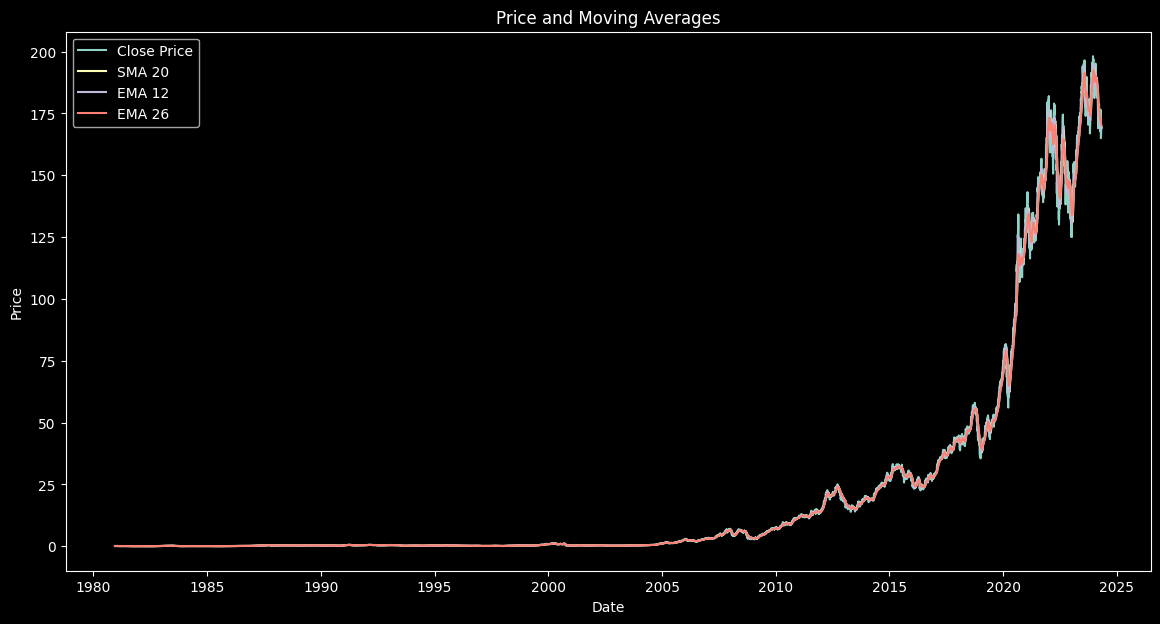

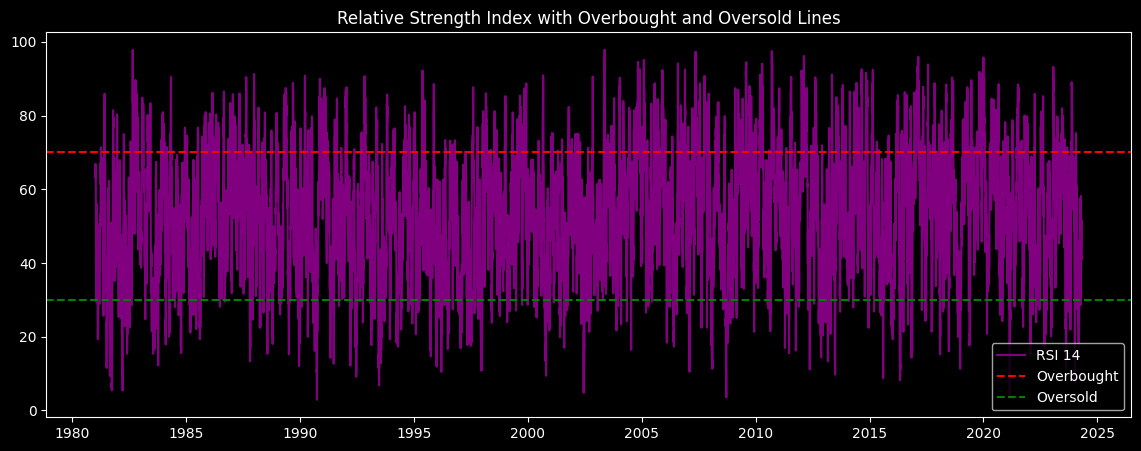

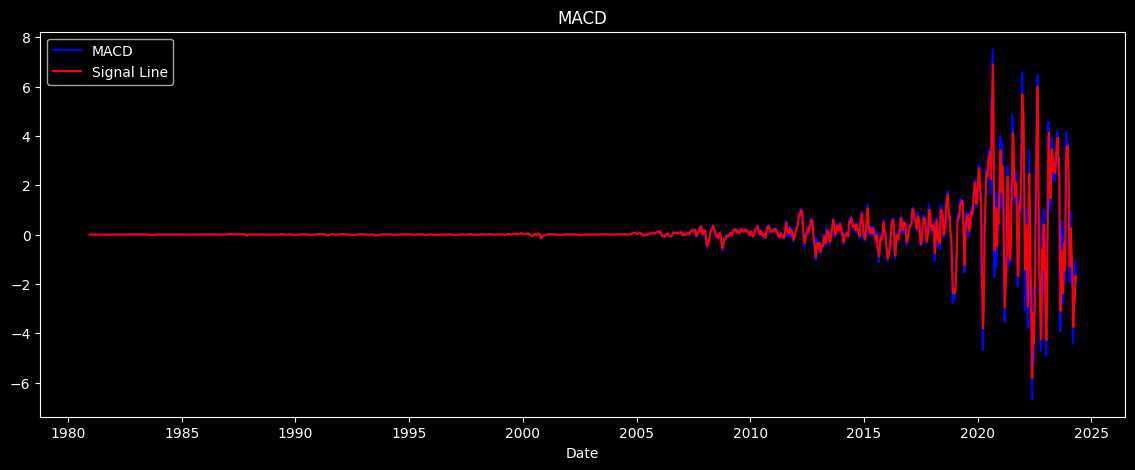

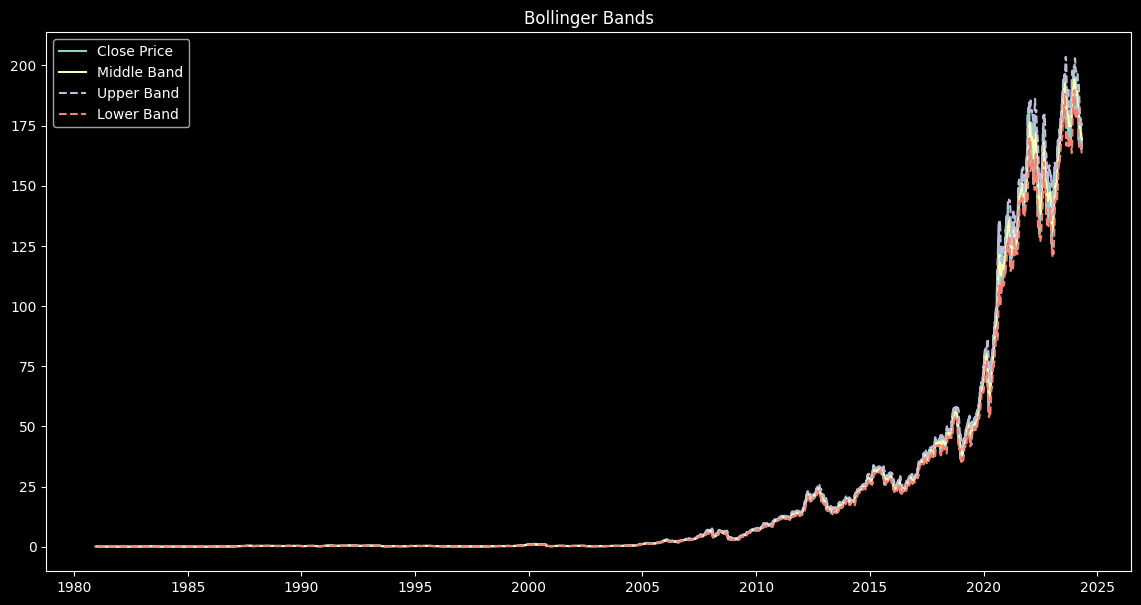

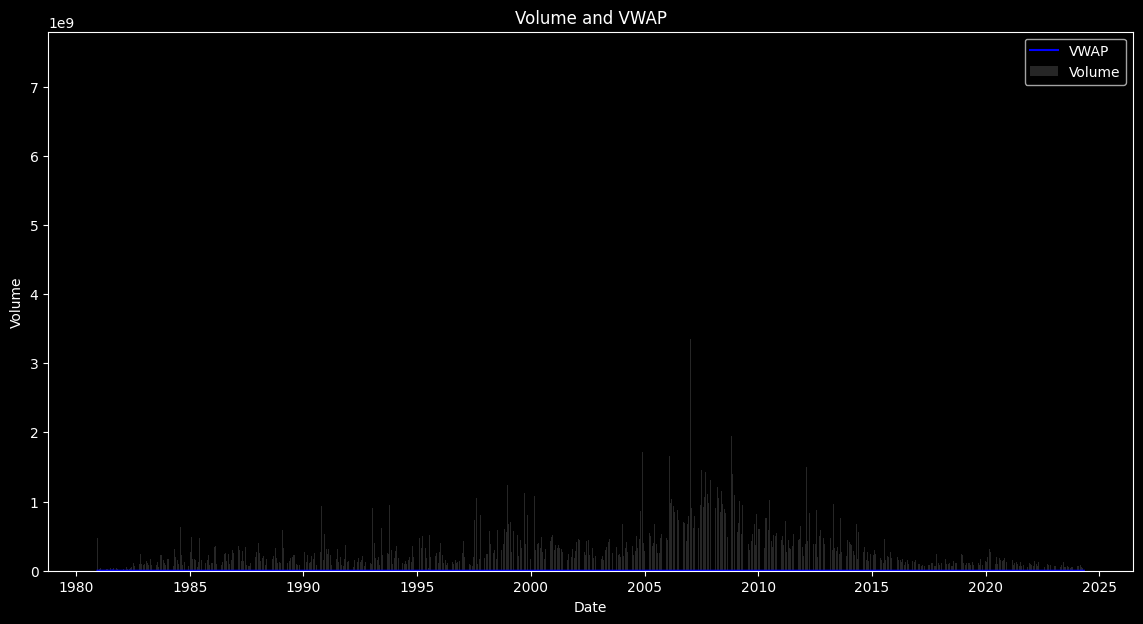

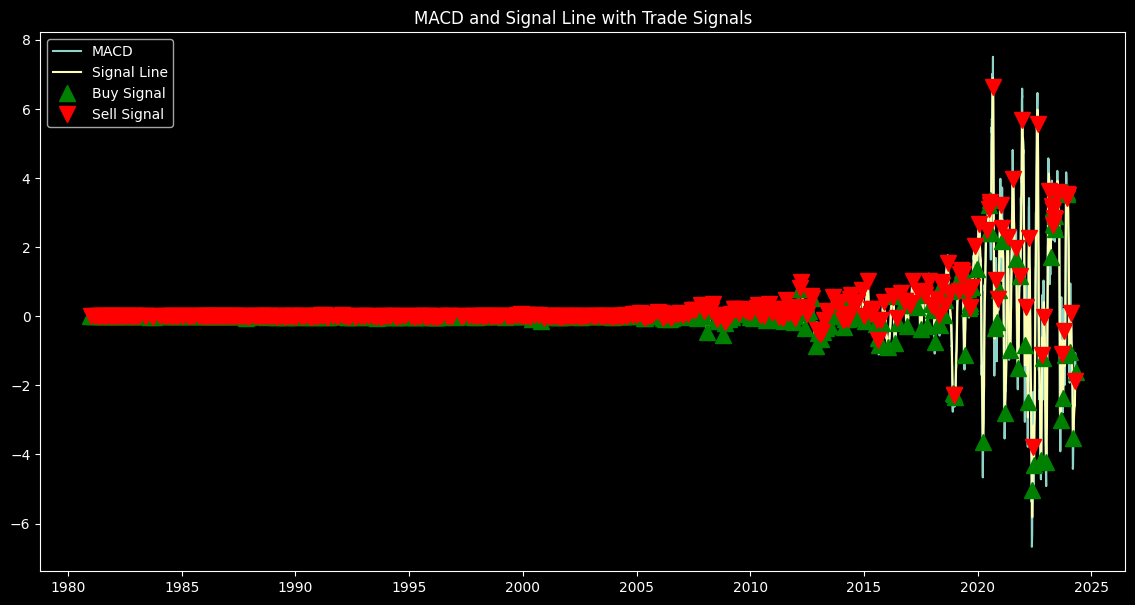

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/s/Downloads/time_series_apple/filtered_stock_data.csv'

df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# plot close price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='SMA 20')
plt.plot(df.index, df['EMA_12'], label='EMA 12')
plt.plot(df.index, df['EMA_26'], label='EMA 26')
plt.title('Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# plot RSI with overbought and oversold lines
def plot_rsi(df):
    plt.figure(figsize=(14, 5))
    plt.plot(df['RSI_14'], label='RSI 14', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title('Relative Strength Index with Overbought and Oversold Lines')
    plt.legend()
    plt.show()

plot_rsi(df)

# plot MACD and Signal Line
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['MACD_Signal'], label='Signal Line', color='red')
plt.title('MACD')
plt.xlabel('Date')
plt.legend()
plt.show()

# plot Bollinger Bands
def plot_bollinger_bands(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['BB_Middle'], label='Middle Band')
    plt.plot(df['BB_Upper'], label='Upper Band', linestyle='--')
    plt.plot(df['BB_Lower'], label='Lower Band', linestyle='--')
    plt.fill_between(df.index, df['BB_Lower'], df['BB_Upper'], color='gray', alpha=0.1)
    plt.title('Bollinger Bands')
    plt.legend()
    plt.show()

plot_bollinger_bands(df)

# plot Volume and VWAP
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'], label='Volume', color='gray', alpha=0.3)
plt.plot(df.index, df['VWAP'], label='VWAP', color='blue')
plt.title('Volume and VWAP')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# plot Williams %R
def plot_macd_cross(df):
    buy_signals = (df['MACD'] > df['MACD_Signal']) & (df['MACD'].shift(1) < df['MACD_Signal'].shift(1))
    sell_signals = (df['MACD'] < df['MACD_Signal']) & (df['MACD'].shift(1) > df['MACD_Signal'].shift(1))
    
    plt.figure(figsize=(14, 7))
    plt.plot(df['MACD'], label='MACD')
    plt.plot(df['MACD_Signal'], label='Signal Line')
    plt.plot(df.index[buy_signals], df['MACD'][buy_signals], 'g^', markersize=12, label='Buy Signal')
    plt.plot(df.index[sell_signals], df['MACD'][sell_signals], 'rv', markersize=12, label='Sell Signal')
    plt.title('MACD and Signal Line with Trade Signals')
    plt.legend()
    plt.show()

plot_macd_cross(df)


In [2]:
! pip install pandas matplotlib numpy scipy backtrader

In [3]:
import pandas as pd

file_path = '/Users/s/Downloads/time_series_apple/AI6123_Time_Series_Assignment_3 (Answer to part 1)/AAPL_from_1980-2024.csv'  

df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)

print("Before conversion:")
print(df['Date'].head())

# convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y').dt.strftime('%Y-%m-%d')

print("\nAfter conversion:")
print(df['Date'].head())

df.to_csv(file_path, index=False)


Before conversion:
0   1980-12-12
1   1980-12-15
2   1980-12-16
3   1980-12-17
4   1980-12-18
Name: Date, dtype: datetime64[ns]

After conversion:
0    1980-12-12
1    1980-12-15
2    1980-12-16
3    1980-12-17
4    1980-12-18
Name: Date, dtype: object


/var/folders/nv/rw3qyw9509147gcgnx8xsx600000gn/T/ipykernel_11702/1820287060.py:6: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)


back trader

In [5]:
import backtrader as bt
from datetime import datetime

# class MyCSVData(bt.feeds.GenericCSVData):
#     params = (
#         ('fromdate', datetime(2023, 1, 1)),
#         ('todate', datetime(2024, 1, 1)),
#         ('nullvalue', 0.0),
#         ('dtformat', ('%Y-%m-%d')),
#         ('datetime', 0),
#         ('open', 1),
#         ('high', 2),
#         ('low', 3),
#         ('close', 4),
#         ('volume', 5),
#         ('openinterest', -1),
#     )

class MACDStrategy(bt.Strategy):
    params = (
        ('macd1', 12),
        ('macd2', 26),
        ('signal', 9),
    )
    
    def log(self, txt, dt=None):
        ''' 日志函数 '''
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')

    def next(self):

        self.log(f'Close, {self.data.close[0]}')

cerebro = bt.Cerebro()

cerebro.addstrategy(MACDStrategy)

data = bt.feeds.YahooFinanceData(dataname='/Users/s/Downloads/time_series_apple/AAPL (3).csv', fromdate=datetime(2023, 4, 27), todate=datetime(2024, 4, 27))
cerebro.adddata(data)

cerebro.broker.setcash(10000.0)

cerebro.addsizer(bt.sizers.FixedSize, stake=10)

cerebro.broker.setcommission(commission=0.001)

cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')

results = cerebro.run()

strat = results[0]
print('最终投资组合价值: %.2f' % cerebro.broker.getvalue())
print('夏普比率:', strat.analyzers.sharpe.get_analysis())
print('最大回撤:', strat.analyzers.drawdown.get_analysis())

cerebro.plot(iplot=True)

# # 保存绘图到文件
# cerebro.plot(style='candlestick', savefig=True, figfilename='/Users/s/Downloads/time_series_apple/backtrader_plot.png')


2023-05-01, Close, 124.17
2023-06-01, Close, 128.74
2023-09-01, Close, 129.26
2023-10-01, Close, 129.84
2023-11-01, Close, 132.58
2023-12-01, Close, 132.5
2023-06-02, Close, 150.69
2023-07-02, Close, 153.59
2023-08-02, Close, 150.88
2023-09-02, Close, 149.84
2023-10-02, Close, 150.21
2023-06-03, Close, 153.01
2023-07-03, Close, 150.8
2023-08-03, Close, 152.06
2023-09-03, Close, 149.79
2023-10-03, Close, 147.71
2023-05-04, Close, 162.89
2023-06-04, Close, 163.79
2023-10-04, Close, 161.17
2023-11-04, Close, 159.95
2023-12-04, Close, 159.25
2023-04-27, Close, 167.52
2023-04-28, Close, 168.78
2023-05-05, Close, 172.65
2023-08-05, Close, 172.58
2023-09-05, Close, 170.86
2023-10-05, Close, 172.64
2023-11-05, Close, 172.83
2023-12-05, Close, 171.89
2023-05-15, Close, 171.39
2023-05-16, Close, 171.39
2023-05-17, Close, 172.01
2023-05-18, Close, 174.36
2023-05-19, Close, 174.47
2023-05-22, Close, 173.51
2023-05-23, Close, 170.89
2023-05-24, Close, 171.16
2023-05-25, Close, 172.31
2023-05-26, Cl

<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]